In [1]:
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

In [2]:
dataset = pd.read_csv('Life Expectancy Data.csv')

In [3]:
df = dataset.iloc[:,3:]
df

,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,44.3,723.0,27,4.36,0.000000,68.0,31,27.1,42,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,44.5,715.0,26,4.06,0.000000,7.0,998,26.7,41,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,40,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,45.3,686.0,25,1.72,0.000000,76.0,529,25.9,39,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [4]:
print(df.isna().any())

Life expectancy                     True
Adult Mortality                     True
infant deaths                      False
Alcohol                             True
percentage expenditure             False
Hepatitis B                         True
Measles                            False
 BMI                                True
under-five deaths                  False
Polio                               True
Total expenditure                   True
Diphtheria                          True
 HIV/AIDS                          False
GDP                                 True
Population                          True
 thinness  1-19 years               True
 thinness 5-9 years                 True
Income composition of resources     True
Schooling                           True
dtype: bool


In [5]:
for i in df.columns:
    cl_mean = df[i].mean()
    print(cl_mean)
    df_filled = df.fillna(cl_mean)
df_filled

69.22493169398912
164.79644808743168
30.303948264125257
4.6028607871720375
738.2512954533823
80.94046121593291
2419.5922396187884
38.32124655647373
42.0357385976855
82.55018842069202
5.9381895280235915
82.32408359027065
1.7421034717494939
7483.158469138481
12753375.120052498
4.8397038567493205
4.870316804407711
0.6275510645976166
11.992792792792786


,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,44.3,723.0,27,4.36,0.000000,68.0,31,27.1,42,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,44.5,715.0,26,4.06,0.000000,7.0,998,26.7,41,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,40,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,45.3,686.0,25,1.72,0.000000,76.0,529,25.9,39,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [6]:
df_filled.isnull().any()

Life expectancy                    False
Adult Mortality                    False
infant deaths                      False
Alcohol                            False
percentage expenditure             False
Hepatitis B                        False
Measles                            False
 BMI                               False
under-five deaths                  False
Polio                              False
Total expenditure                  False
Diphtheria                         False
 HIV/AIDS                          False
GDP                                False
Population                         False
 thinness  1-19 years              False
 thinness 5-9 years                False
Income composition of resources    False
Schooling                          False
dtype: bool

In [7]:
rdf = df_filled.round(decimals = 3)
rdf

,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,65.0,263.0,62,0.01,71.280,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259,33736494.0,17.2,17.3,0.479,10.1
1,59.9,271.0,64,0.01,73.524,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.697,327582.0,17.5,17.5,0.476,10.0
2,59.9,268.0,66,0.01,73.219,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.745,31731688.0,17.7,17.7,0.470,9.9
3,59.5,272.0,69,0.01,78.184,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959,3696958.0,17.9,18.0,0.463,9.8
4,59.2,275.0,71,0.01,7.097,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,44.3,723.0,27,4.36,0.000,68.0,31,27.1,42,67.0,7.13,65.0,33.6,454.367,12777511.0,9.4,9.4,0.407,9.2
2934,44.5,715.0,26,4.06,0.000,7.0,998,26.7,41,7.0,6.52,68.0,36.7,453.351,12633897.0,9.8,9.9,0.418,9.5
2935,44.8,73.0,25,4.43,0.000,73.0,304,26.3,40,73.0,6.53,71.0,39.8,57.348,125525.0,1.2,1.3,0.427,10.0
2936,45.3,686.0,25,1.72,0.000,76.0,529,25.9,39,76.0,6.16,75.0,42.1,548.587,12366165.0,1.6,1.7,0.427,9.8


In [8]:
def le_class(row):
    if row['Life expectancy '] <50:
        return 0
    else:
        return 1

In [9]:
rdf = rdf.assign(le_class = rdf.apply(le_class, axis =1))
rdf

,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,le_class
0,65.0,263.0,62,0.01,71.280,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259,33736494.0,17.2,17.3,0.479,10.1,1
1,59.9,271.0,64,0.01,73.524,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.697,327582.0,17.5,17.5,0.476,10.0,1
2,59.9,268.0,66,0.01,73.219,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.745,31731688.0,17.7,17.7,0.470,9.9,1
3,59.5,272.0,69,0.01,78.184,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959,3696958.0,17.9,18.0,0.463,9.8,1
4,59.2,275.0,71,0.01,7.097,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537,2978599.0,18.2,18.2,0.454,9.5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,44.3,723.0,27,4.36,0.000,68.0,31,27.1,42,67.0,7.13,65.0,33.6,454.367,12777511.0,9.4,9.4,0.407,9.2,0
2934,44.5,715.0,26,4.06,0.000,7.0,998,26.7,41,7.0,6.52,68.0,36.7,453.351,12633897.0,9.8,9.9,0.418,9.5,0
2935,44.8,73.0,25,4.43,0.000,73.0,304,26.3,40,73.0,6.53,71.0,39.8,57.348,125525.0,1.2,1.3,0.427,10.0,0
2936,45.3,686.0,25,1.72,0.000,76.0,529,25.9,39,76.0,6.16,75.0,42.1,548.587,12366165.0,1.6,1.7,0.427,9.8,0


In [10]:
r = rdf['Alcohol'] , rdf['Life expectancy ']
# r = rdf['Life expectancy ']
r

(0       0.01
 1       0.01
 2       0.01
 3       0.01
 4       0.01
         ... 
 2933    4.36
 2934    4.06
 2935    4.43
 2936    1.72
 2937    1.68
 Name: Alcohol, Length: 2938, dtype: float64,
 0       65.0
 1       59.9
 2       59.9
 3       59.5
 4       59.2
         ... 
 2933    44.3
 2934    44.5
 2935    44.8
 2936    45.3
 2937    46.0
 Name: Life expectancy , Length: 2938, dtype: float64)

In [20]:
#Creating the model
 
agg_clustering = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
 
#predicting the labels
 
labels = agg_clustering.fit_predict(rdf)

In [21]:
rdf['le_class']

0       1
1       1
2       1
3       1
4       1
       ..
2933    0
2934    0
2935    0
2936    0
2937    0
Name: le_class, Length: 2938, dtype: int64

In [22]:
labels

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

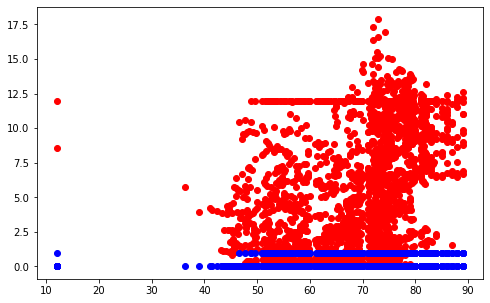

In [23]:
#Plotting the results
 
plt.figure(figsize = (8,5))
plt.scatter(rdf['Life expectancy '], rdf["Alcohol"], c = 'red')
plt.scatter(rdf['Life expectancy '], rdf["Alcohol"]>=10, c = 'blue')
# plt.scatter(rdf['Life expectancy '], rdf["Alcohol"]>12 , c = 'green')
plt.show()

In [ ]:
plt.figure(figsize = (8,5))
plt.scatter(df[labels == 0 , 0] , df[labels == 0 , 1] , c = 'red')
plt.scatter(df[labels == 1 , 0] , df[labels == 1 , 1] , c = 'blue')
plt.scatter(df[labels == 2 , 0] , df[labels == 2 , 1] , c = 'green')
plt.show()

In [ ]:
#Linkage Matrix
Z = linkage(rdf, method = 'ward')
 
#plotting dendrogram
dendro = dendrogram(Z)
plt.title('Dendrogram')
plt.ylabel('Euclidean distance')
plt.show()